Mean Squared Error: 14628664.036287827
R² Score: 0.8146957315667038

المعاملات لكل Feature:
                  Coefficient
wheelbase          107.723621
carlength          -78.504465
carwidth           558.104907
carheight          178.664877
curbweight           0.450995
enginesize         123.645081
boreratio         -358.167959
stroke           -3204.346180
compressionratio   373.891372
horsepower          16.153451
peakrpm              2.612324
citympg           -496.427160
highwaympg         235.419918


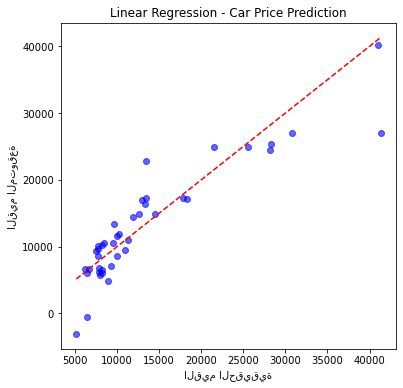

In [11]:
# استيراد المكتبات
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1️⃣ تحميل البيانات
data = pd.read_csv("CarPrice_Assignment.csv")

# 2️⃣ اختيار المتغير الهدف (Target) والمتغيرات المستقلة (Features)
# نختار الأعمدة الرقمية فقط
features = [
    "wheelbase", "carlength", "carwidth", "carheight", "curbweight",
    "enginesize", "boreratio", "stroke", "compressionratio",
    "horsepower", "peakrpm", "citympg", "highwaympg"
]

X = data[features]
y = data["price"]

# 3️⃣ تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4️⃣ إنشاء نموذج الانحدار الخطي وتدريبه
model = LinearRegression()
model.fit(X_train, y_train)

# 5️⃣ التنبؤ على بيانات الاختبار
y_pred = model.predict(X_test)

# 6️⃣ تقييم النموذج
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# 7️⃣ عرض المعاملات (Coefficients) لكل متغير
coeff_df = pd.DataFrame(model.coef_, features, columns=["Coefficient"])
print("\nالمعاملات لكل Feature:")
print(coeff_df)

# 8️⃣ رسم العلاقة بين القيم الحقيقية والمتوقعة
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.xlabel("القيم الحقيقية")
plt.ylabel("القيم المتوقعة")
plt.title("Linear Regression - Car Price Prediction")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()